#Bank customer churn prediction using Machine learning 
Task 1 of codsoft internship

In [1]:
import pandas as pd

In [2]:
data= pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
print("No. of rows :-", data.shape[0])
print("No. of columns :-", data.shape[1])

No. of rows :- 10000
No. of columns :- 14


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'] , axis =1)

In [12]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
data = pd.get_dummies(data,drop_first=True)

In [15]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
x=data.drop('Exited', axis=1)
y=data['Exited']

In [18]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Handling Imbalanced data with SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [22]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split (x_res,y_res, test_size=0.20, random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler


In [25]:
sc = StandardScaler()   #STANDARDISATION

In [26]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [27]:
x_train

array([[-0.81088305,  0.80536189, -0.30295903, ..., -0.57142857,
        -0.46350557, -0.84811452],
       [ 1.10044672,  0.10384331, -1.41153672, ..., -0.57142857,
        -0.46350557,  1.17908605],
       [-0.22110129,  1.00579577, -1.04201082, ..., -0.57142857,
        -0.46350557, -0.84811452],
       ...,
       [ 0.2048522 ,  0.20406025,  1.17514456, ..., -0.57142857,
        -0.46350557,  1.17908605],
       [ 0.04102394,  0.60492801, -1.04201082, ..., -0.57142857,
         2.15747135, -0.84811452],
       [ 0.53250873,  1.00579577, -1.41153672, ...,  1.75      ,
        -0.46350557,  1.17908605]])

In [28]:
x_test

array([[-1.23683654, -1.1989769 ,  0.06656687, ..., -0.57142857,
        -0.46350557, -0.84811452],
       [-0.46138275,  0.00362637, -0.30295903, ...,  1.75      ,
        -0.46350557, -0.84811452],
       [ 0.3468367 , -0.99854302,  1.54467046, ..., -0.57142857,
         2.15747135, -0.84811452],
       ...,
       [ 0.10655524, -0.29702444,  0.43609277, ..., -0.57142857,
        -0.46350557, -0.84811452],
       [ 1.11136861,  1.10601271,  0.43609277, ...,  1.75      ,
        -0.46350557, -0.84811452],
       [ 0.82739961,  0.50471107, -0.30295903, ..., -0.57142857,
        -0.46350557,  1.17908605]])

# Diffrent Algorithm 
1 . Logistic Regrssion

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score

In [30]:
log= LogisticRegression()

In [31]:
log.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred1=log.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
ac= accuracy_score(y_test,y_pred1)

In [35]:
ac

0.7947269303201506

In [36]:
precision_score(y_test,y_pred1)

0.7772979642196175

In [37]:
recall_score(y_test,y_pred1)

0.8113329040566645

In [38]:
f1_score(y_test,y_pred1)

0.7939508506616256

2nd method :- Support Vector Machine

In [39]:
from sklearn import svm

In [40]:
svm= svm.SVC ()

In [41]:
svm.fit(x_train, y_train)

SVC()

In [42]:
y_pred2 = svm.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.8440050219711237

In [44]:
precision_score(y_test,y_pred2)

0.8287671232876712

In [45]:
f1_score(y_test,y_pred2)

0.8426717315606204

In [46]:
recall_score(y_test,y_pred2)

0.8570508692852543

method 3:- Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred4= dt.predict(x_test)

In [51]:
accuracy_score(y_test , y_pred4)

0.7959824231010671

In [52]:
precision_score(y_test,y_pred4)

0.774468085106383

In [53]:
f1_score(y_test,y_pred4)

0.7967479674796748

method 4:-  KNeighbors Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn=  KNeighborsClassifier()

In [56]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred3 = knn.predict(x_test)

In [58]:
accuracy_score(y_test, y_pred3)

0.8279974890144381

In [59]:
f1_score(y_test, y_pred3)

0.8277812696417348

In [60]:
recall_score(y_test, y_pred3)

0.8480360592401803

In [61]:
precision_score(y_test, y_pred3)

0.8084714548802947

method 5 :- Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf=RandomForestClassifier()

In [64]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
y_pred5= rf.predict(x_test)


In [66]:
accuracy_score(y_test , y_pred5)

0.8640929064657878

In [67]:
precision_score(y_test,y_pred5)

0.8513174404015057

In [68]:
f1_score(y_test,y_pred5)

0.8624086431522084

In [69]:
recall_score(y_test,y_pred5)

0.8737926593689633

In [70]:
final_data=pd.DataFrame({'Models': ['LR','SVC','KNN','DT','RF'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                   accuracy_score(y_test,y_pred5)
                                    ]})

In [71]:
final_data

,Models,ACC
0,LR,0.794727
1,SVC,0.844005
2,KNN,0.827997
3,DT,0.795982
4,RF,0.864093


In [72]:
import seaborn as sns
import matplotlib as plt

<Axes: xlabel='Models', ylabel='ACC'>

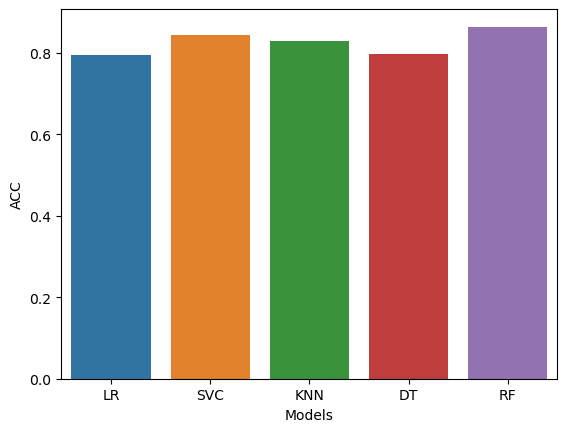

In [73]:
sns.barplot(x='Models', y='ACC', data=final_data)


In [75]:
final_data=pd.DataFrame({'Models': ['LR','SVC','KNN','DT','RF'],
                         'PS':[precision_score(y_test,y_pred1),
                               precision_score(y_test,y_pred2),
                                 precision_score(y_test,y_pred3),
                               precision_score(y_test,y_pred4),
                                   precision_score(y_test,y_pred5)
                                    ]})

<Axes: xlabel='Models', ylabel='PS'>

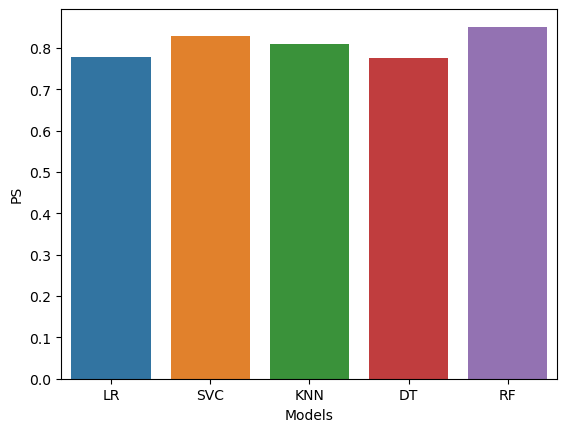

In [76]:
sns.barplot(x='Models', y='PS', data=final_data)


SAVE THE MODEL


In [77]:
x_res = sc.fit_transform(x_res)

In [78]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [79]:
import joblib

In [80]:
joblib.dump(rf,'churn_prediction')

['churn_prediction']

In [81]:
model=joblib.load('churn_prediction')

In [82]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [83]:
model.predict([[619,42,2,0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

GUI

In [84]:
from tkinter import*

In [85]:
from sklearn.preprocessing import StandardScaler
import joblib

In [88]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 == 3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1
    p10=int(e10.get())
    model = joblib.load('churn_prediction')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,p6,
                           p7,p8,Geography_Germany,Geography_Spain,p10]]))
    if result == 0:
        Label(master, text="No Exit").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)


master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)
Label(master,text="Gender").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
